In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
plt.style.use('dark_background')
sns.set_theme(style='darkgrid')

In [4]:
# parsing dates
df = pd.read_csv("TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

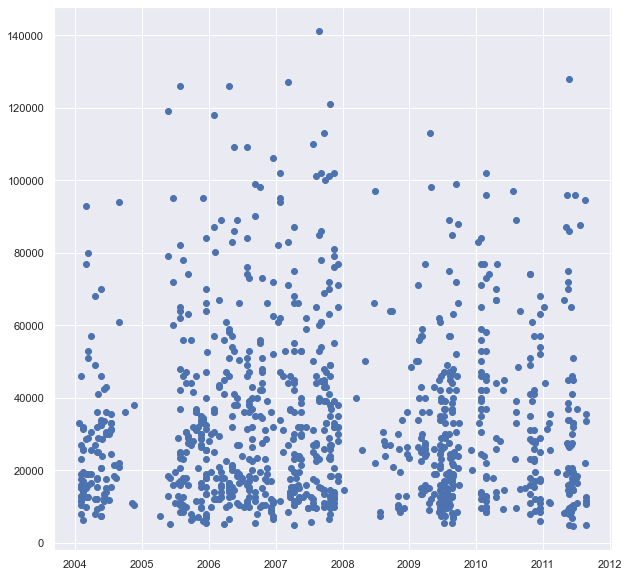

In [5]:
fig ,ax =plt.subplots(figsize=(10,10))
ax.scatter (df["saledate"][:1000],df["SalePrice"][:1000])


In [6]:
# sort data by dates 
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [7]:
# Always make a backup copy 
df_copy =df.copy()


In [8]:
df_copy["saledate"].head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [9]:
df_copy["saleyear"]=df_copy.saledate.dt.year
df_copy["saleday"]=df_copy.saledate.dt.day
df_copy["salemonth"]=df_copy.saledate.dt.month
df_copy["saledayofweek"]=df_copy.saledate.dt.dayofweek
df_copy["saledayofyear"]=df_copy.saledate.dt.dayofyear
df_copy.drop(["saledate"],axis = 1,inplace=True)

### convert data into categories 

In [10]:
# convert string columns into strings 
for label ,content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_copy[label]=content.astype("category").cat.as_ordered() 

In [11]:
df_copy.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

## Filling missing values 

In [12]:
# filling all numeric values with the medians of the respective columns 
for label ,content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_copy[label+"_is_missing"]=pd.isnull(content)
            df_copy[label]=content.fillna(content.median())

In [13]:
#filling missing values in categories 
for label ,content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):       
        df_copy[label+"_is_missing"]=pd.isnull(content)
#         turn categories into numbers 
        df_copy[label]=pd.Categorical(content).codes+1
#     +1 because codes stores values starting from -1

In [14]:
df_copy.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## modelling 

In [15]:
%%time 
#calculating time in running the model 
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,random_state=42)
x=df_copy.drop(["SalePrice"],axis=1)
y=df_copy["SalePrice"]
model.fit(x,y)

Wall time: 2min 7s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [16]:
model.score(x,y)

0.9875440066186206

 ## splitting data into train and validation set 

In [17]:
df_val =df_copy[df_copy.saleyear==2012]
df_train =df_copy[df_copy.saleyear!=2012]


In [18]:
# split data into x  and y/
x_train ,y_train =df_train.drop("SalePrice",axis=1),df_train.SalePrice
x_valid,y_valid =df_val.drop("SalePrice",axis=1),df_val.SalePrice

In [46]:
# create evaluation function 

from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

y_preds=model.predict(x_train)

def show_score(model):
    train_preds =model.predict(x_train)
    val_preds =model.predict(x_valid)
    scores ={
            "Training MAE ":mean_absolute_error(y_train,train_preds),
            "valid MAE": mean_absolute_error(y_valid,val_preds),
            "Training RMSLE ":mean_squared_log_error(y_train,train_preds),
            "valid RMSLE": mean_squared_log_error(y_valid,val_preds),
            "Traning R^2":r2_score(y_train,y_preds),
            "Valid R^2":r2_score(y_valid,val_preds)
            }
    return scores

expermenting models on a subset of data to reduce time 


In [47]:
%%time
model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
model.fit(x_train,y_train)

Wall time: 7.91 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [48]:
show_score(model)

{'Training MAE ': 5562.079819856652,
 'valid MAE': 7178.695028082606,
 'Training RMSLE ': 0.06642868886112623,
 'valid RMSLE': 0.08604693264103552,
 'Traning R^2': 0.8605891310325422,
 'Valid R^2': 0.8315394436192207}

Hyper parameter tunnig by randmized search cv

In [49]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid ={"n_estimators":np.arange(10,200,10),
         "max_depth":[None,3,5,10,20],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_features":[0.5,1,"sqrt","auto"],
         "max_samples":[10000]
         }

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                  random_state=42),
                                                  param_distributions=rf_grid,
                                                  n_iter=2,
                                                  cv=5,
                                                  verbose=True)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 43.5 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   verbose=True)

In [50]:
rs_model.best_params_

{'n_estimators': 130,
 'min_samples_split': 4,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [52]:
show_score(rs_model)

{'Training MAE ': 8453.509454378727,
 'valid MAE': 10060.509478543836,
 'Training RMSLE ': 0.13838421336098308,
 'valid RMSLE': 0.16178748341423968,
 'Traning R^2': 0.8605891310325422,
 'Valid R^2': 0.7040262744067604}

In [53]:
%%time
ideal_model =RandomForestRegressor(n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   random_state=42,
                                   max_samples=None
                                  )
ideal_model.fit(x_train,y_train)

Wall time: 29.7 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [54]:
# scores for idal  model
show_score(ideal_model)

{'Training MAE ': 2955.983933299897,
 'valid MAE': 5964.177153673459,
 'Training RMSLE ': 0.020903798604182466,
 'valid RMSLE': 0.0611516379574698,
 'Traning R^2': 0.8605891310325422,
 'Valid R^2': 0.8811250314619335}

0.9587327618460258